In [1]:
import scipy
from scipy.special import jv
from scipy.fftpack import *
import numpy as np
import matplotlib.pyplot as plt
import ehtim as eh
from ehtim.calibrating import self_cal as sc
import ehtim.observing.pulses as pl
from ehtim.const_def import *

Welcome to eht-imaging! v 1.2.6 



In [4]:
# I think this creates the array 
x = np.linspace(-50,50,1000)
muas2rad = 1e-6/3600*np.pi/180
x *= muas2rad
X,Y = np.meshgrid(x,x)
R = np.sqrt(X**2+Y**2)
psize = np.diff(x)[0]
umax = 1./psize/2.
umin = 1./(np.amax(x)-np.amin(x))
def Gaussian2d(x,y,sigma,x_offset,y_offset):
       return np.exp(-((x + x_offset)**2 + (y + y_offset)**2) / (sigma / 0.5)**2)

image = np.zeros(np.shape(X)) # start with empty image
image += 1.*((R<=25.*muas2rad) & (R>=15.*muas2rad)) # add circle
image += Gaussian2d(X,Y,10.*muas2rad,20.*muas2rad,0.*muas2rad) # add 2D Gaussian

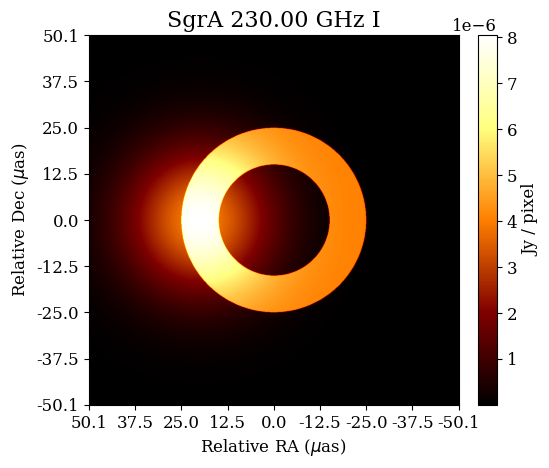

1.0000000000000002

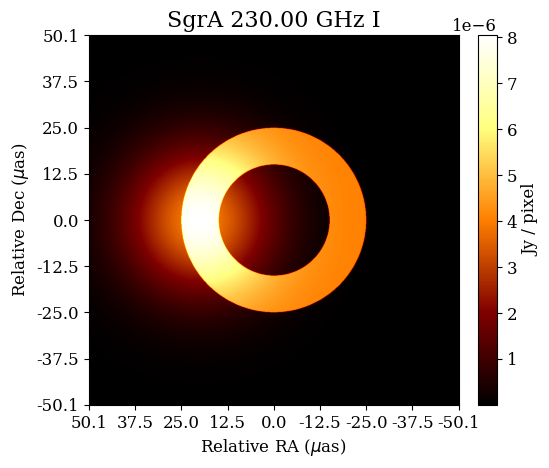

In [5]:
image /= np.sum(image)

# this creates an eh.image object which ehtim can work with
im = eh.image.Image(image[:,:],psize,RA_DEFAULT,DEC_DEFAULT,RF_DEFAULT, mjd=MJD_DEFAULT,pulse=pl.deltaPulse2D)

zbl = im.total_flux()

# this is the lines that don't work for me
im.display()
im.display(export_pdf = "pdf", show=False)
zbl

In [6]:
eht = eh.array.load_txt('../arrays/EHT2017.txt')

In [7]:
from __future__ import division
from __future__ import print_function

import matplotlib.pyplot as plt
import numpy as np
import ehtim as eh
from   ehtim.calibrating import self_cal as sc
import time
#from  ehtim.plotting import self_cal as sc
plt.close('all')

ttype = 'direct'

In [8]:
tint_sec = 5
tadv_sec = 600
tstart_hr = 0
tstop_hr = 24
bw_hz = 4e9
obs = im.observe(eht, tint_sec, tadv_sec, tstart_hr, tstop_hr, bw_hz,
                 sgrscat=False, ampcal=True, phasecal=False)

Generating empty observation file . . . 
Producing clean visibilities from image with nfft FT . . . 
Adding gain + phase errors to data and applying a priori calibration . . . 
   Applying atmospheric phase corruption: phasecal-->False
Adding thermal noise to data . . . 


Clean beam parameters:  [1.19728384e-10 7.88252023e-11 1.38129500e+00]
Nominal Resolution:  1.1454591407637095e-10
Generating I image...
Initial S_1: 0.000000 S_2: 0.000000 S_3: 0.000000
Initial Chi^2_1: 186.878336 Chi^2_2: 1.000000 Chi^2_3: 1.000000
Initial Objective Function: 18587.833554
Total Data 1:  645
Total Pixel #:  16384
Clipped Pixel #:  16384

i: 0 chi2_1: 186.88 chi2_2: 1.00 chi2_3: 1.00 s_1: 0.00 s_2: 0.00 s_3: 0.00


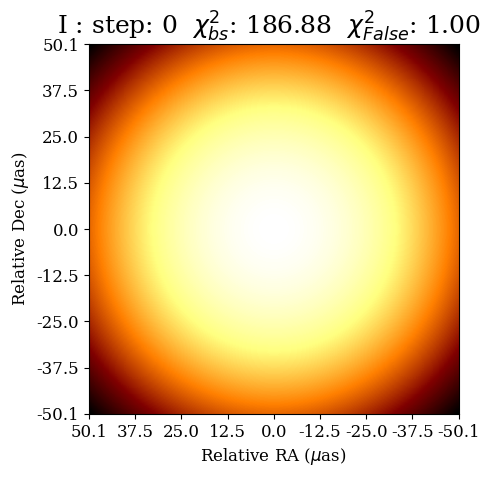

i: 1 chi2_1: 147.58 chi2_2: 1.00 chi2_3: 1.00 s_1: 0.08 s_2: 0.00 s_3: 0.00


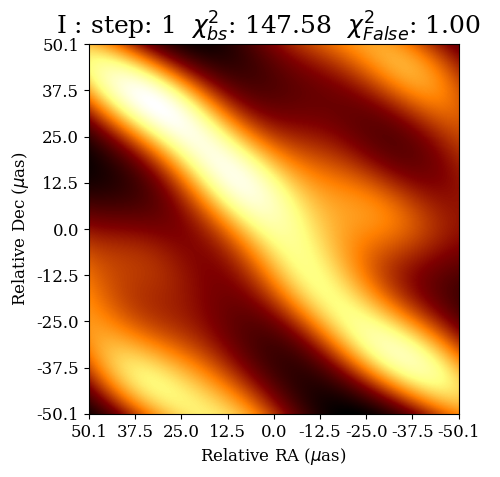

i: 2 chi2_1: 147.32 chi2_2: 1.00 chi2_3: 1.00 s_1: 0.08 s_2: 0.00 s_3: 0.00


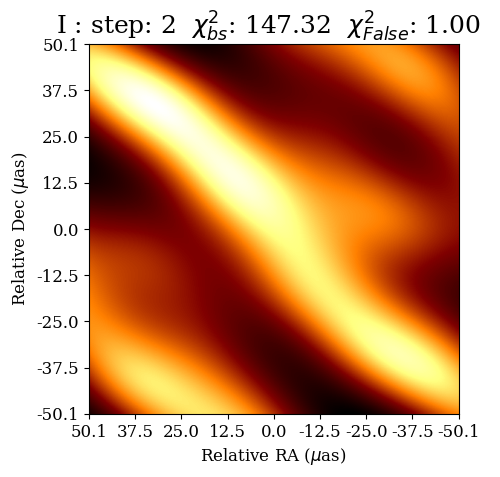

i: 3 chi2_1: 120.00 chi2_2: 1.00 chi2_3: 1.00 s_1: 0.18 s_2: 0.00 s_3: 0.00


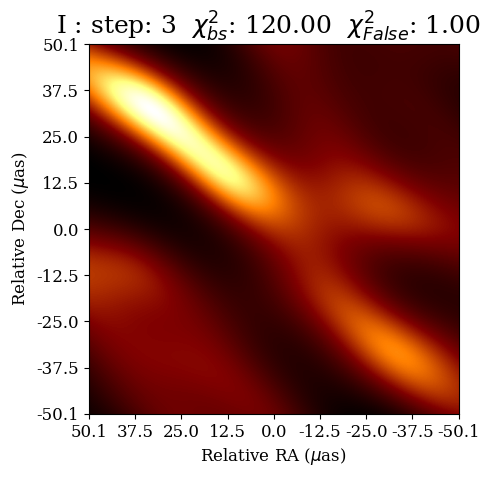

i: 4 chi2_1: 95.69 chi2_2: 1.00 chi2_3: 1.00 s_1: 0.20 s_2: 0.00 s_3: 0.00


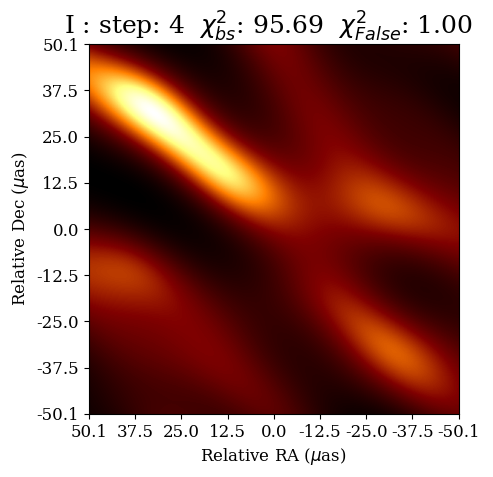

i: 5 chi2_1: 93.23 chi2_2: 1.00 chi2_3: 1.00 s_1: 0.17 s_2: 0.00 s_3: 0.00


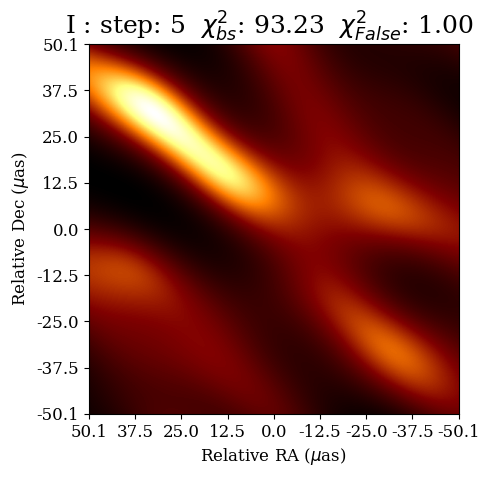

i: 6 chi2_1: 87.78 chi2_2: 1.00 chi2_3: 1.00 s_1: 0.19 s_2: 0.00 s_3: 0.00


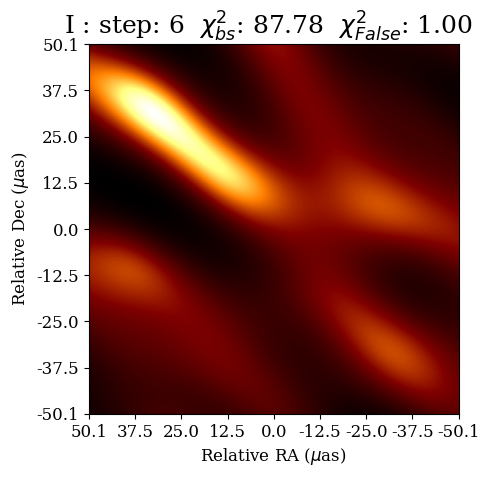

i: 7 chi2_1: 75.90 chi2_2: 1.00 chi2_3: 1.00 s_1: 0.22 s_2: 0.00 s_3: 0.00


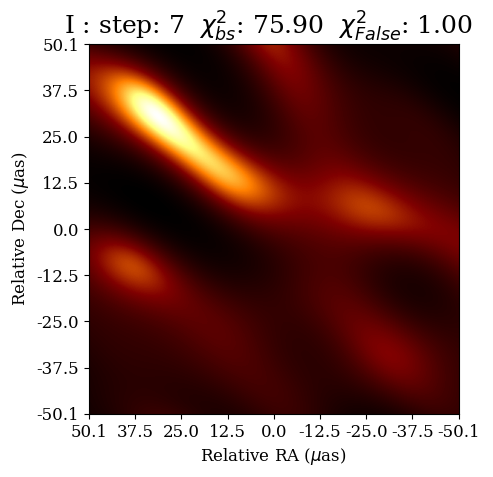

i: 8 chi2_1: 64.02 chi2_2: 1.00 chi2_3: 1.00 s_1: 0.25 s_2: 0.00 s_3: 0.00


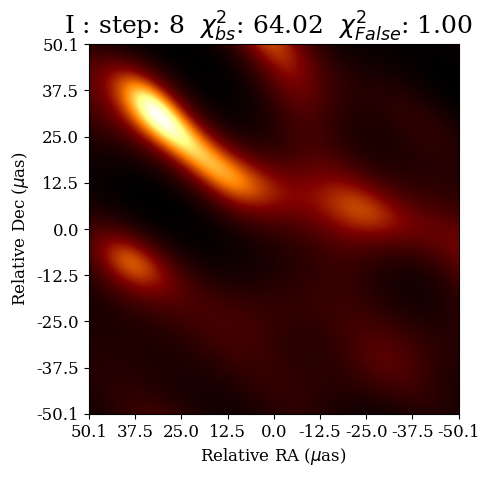

i: 9 chi2_1: 51.00 chi2_2: 1.00 chi2_3: 1.00 s_1: 0.27 s_2: 0.00 s_3: 0.00


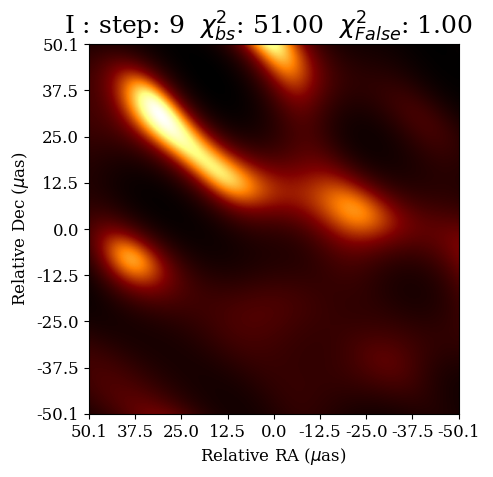

i: 10 chi2_1: 47.72 chi2_2: 1.00 chi2_3: 1.00 s_1: 0.31 s_2: 0.00 s_3: 0.00


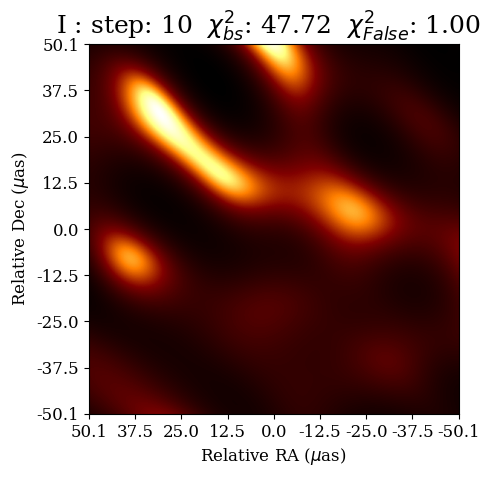

i: 11 chi2_1: 41.78 chi2_2: 1.00 chi2_3: 1.00 s_1: 0.35 s_2: 0.00 s_3: 0.00


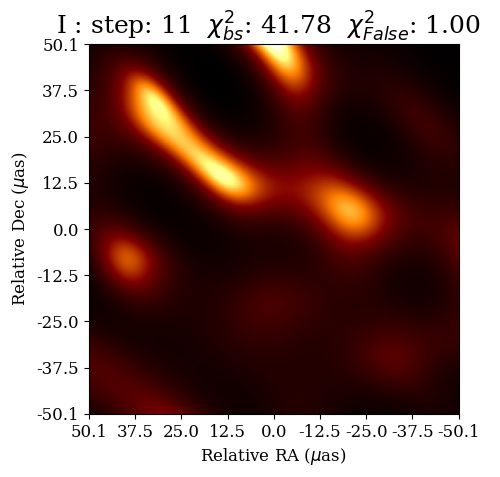

i: 12 chi2_1: 37.55 chi2_2: 1.00 chi2_3: 1.00 s_1: 0.34 s_2: 0.00 s_3: 0.00


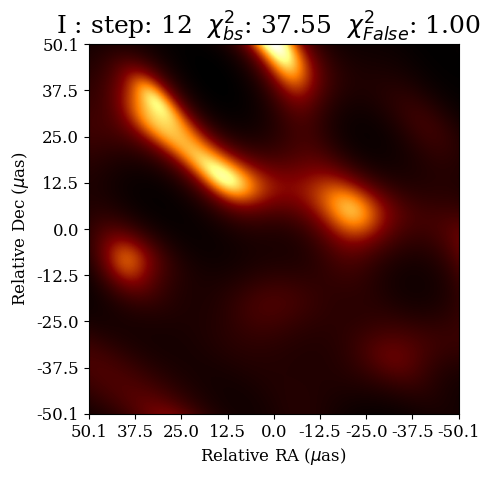

i: 13 chi2_1: 32.49 chi2_2: 1.00 chi2_3: 1.00 s_1: 0.41 s_2: 0.00 s_3: 0.00


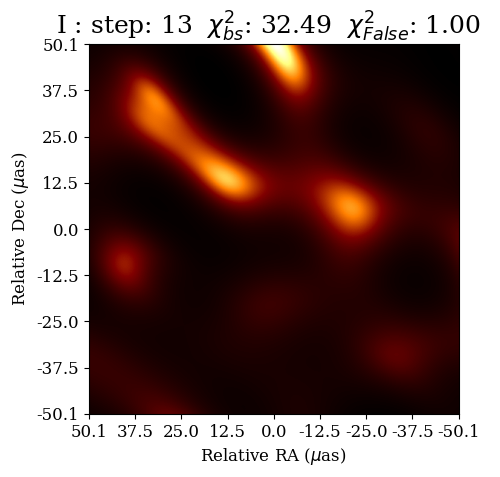

i: 14 chi2_1: 29.35 chi2_2: 1.00 chi2_3: 1.00 s_1: 0.41 s_2: 0.00 s_3: 0.00


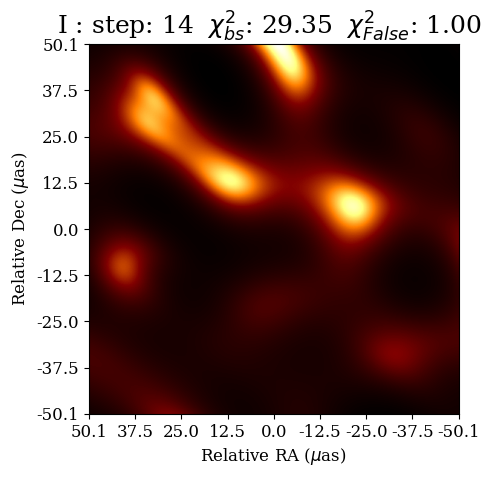

i: 15 chi2_1: 25.75 chi2_2: 1.00 chi2_3: 1.00 s_1: 0.43 s_2: 0.00 s_3: 0.00


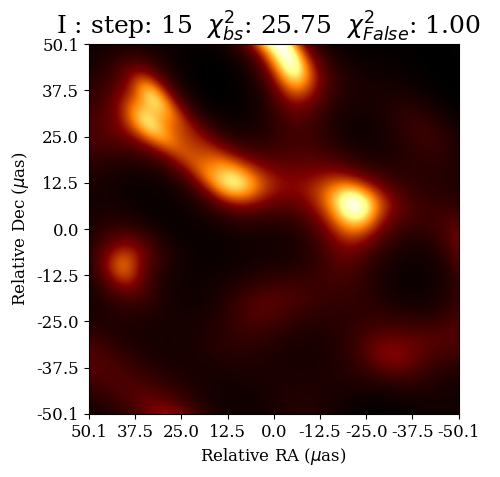

i: 16 chi2_1: 22.23 chi2_2: 1.00 chi2_3: 1.00 s_1: 0.51 s_2: 0.00 s_3: 0.00


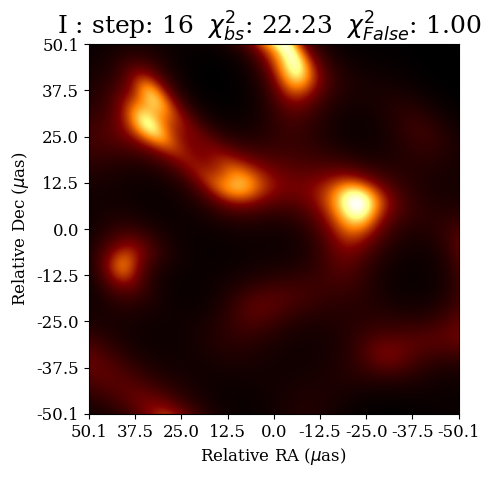

i: 17 chi2_1: 19.86 chi2_2: 1.00 chi2_3: 1.00 s_1: 0.48 s_2: 0.00 s_3: 0.00


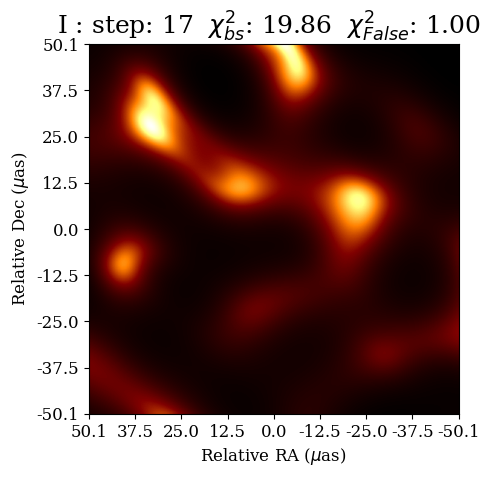

i: 18 chi2_1: 17.90 chi2_2: 1.00 chi2_3: 1.00 s_1: 0.51 s_2: 0.00 s_3: 0.00


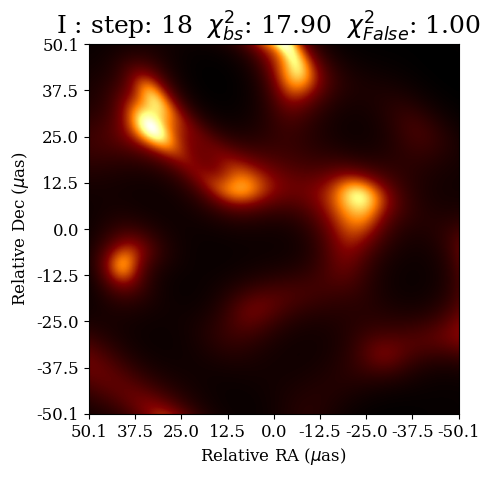

i: 19 chi2_1: 16.68 chi2_2: 1.00 chi2_3: 1.00 s_1: 0.53 s_2: 0.00 s_3: 0.00


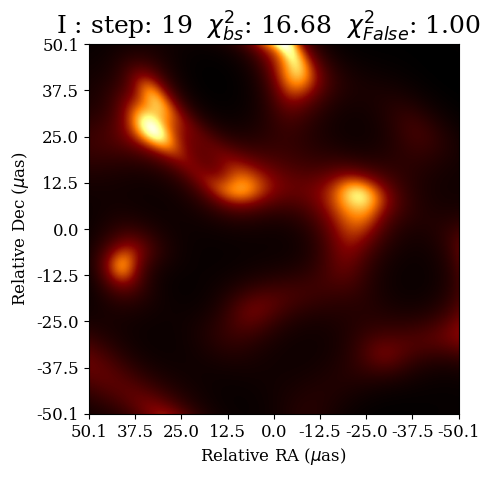

i: 20 chi2_1: 14.95 chi2_2: 1.00 chi2_3: 1.00 s_1: 0.57 s_2: 0.00 s_3: 0.00


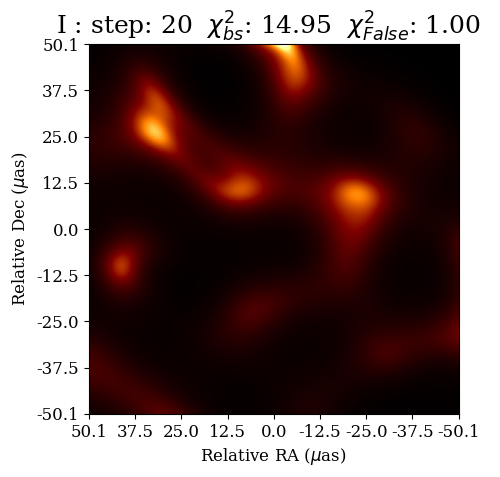

i: 21 chi2_1: 13.51 chi2_2: 1.00 chi2_3: 1.00 s_1: 0.58 s_2: 0.00 s_3: 0.00


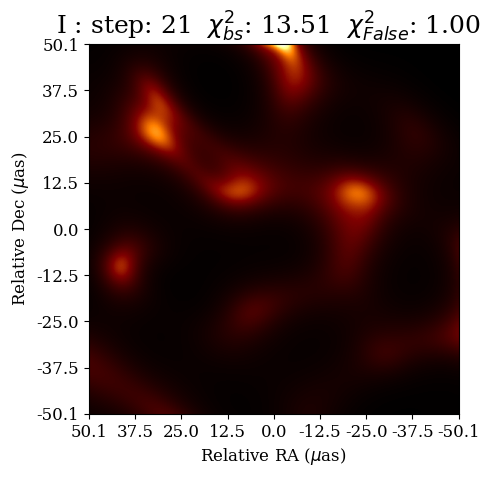

i: 22 chi2_1: 11.89 chi2_2: 1.00 chi2_3: 1.00 s_1: 0.61 s_2: 0.00 s_3: 0.00


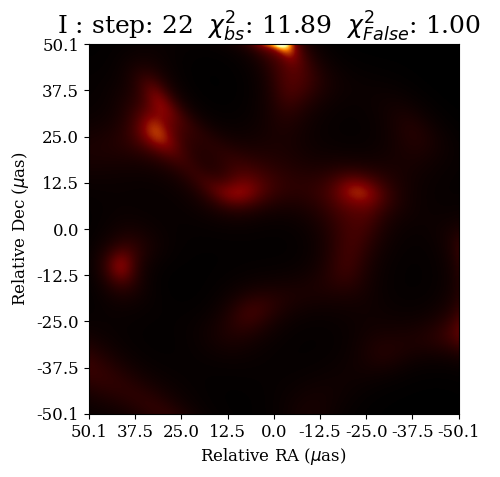

i: 23 chi2_1: 11.57 chi2_2: 1.00 chi2_3: 1.00 s_1: 0.62 s_2: 0.00 s_3: 0.00


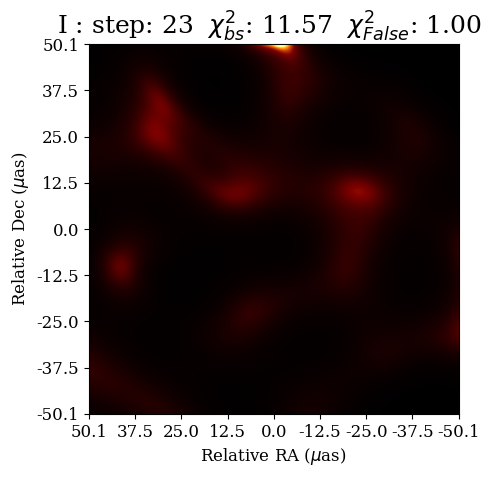

i: 24 chi2_1: 11.21 chi2_2: 1.00 chi2_3: 1.00 s_1: 0.64 s_2: 0.00 s_3: 0.00


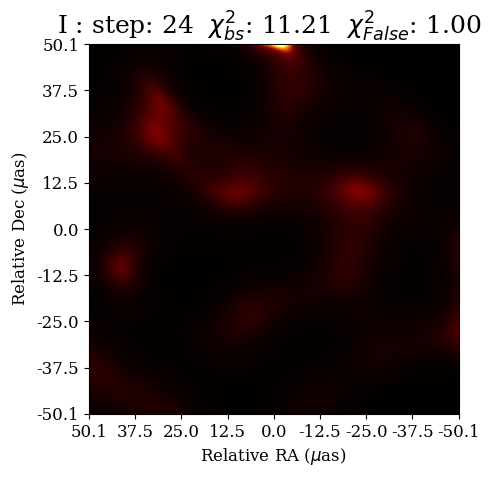

i: 25 chi2_1: 11.04 chi2_2: 1.00 chi2_3: 1.00 s_1: 0.64 s_2: 0.00 s_3: 0.00


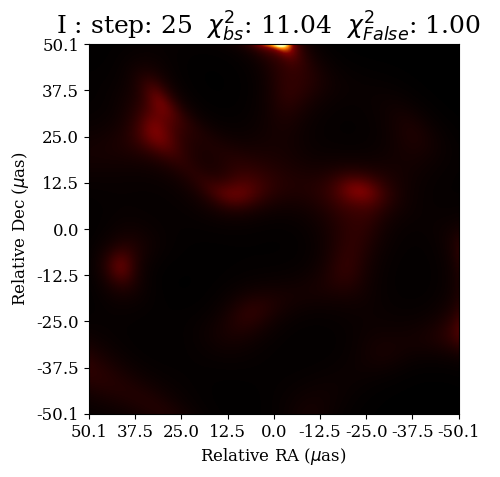

i: 26 chi2_1: 10.77 chi2_2: 1.00 chi2_3: 1.00 s_1: 0.66 s_2: 0.00 s_3: 0.00


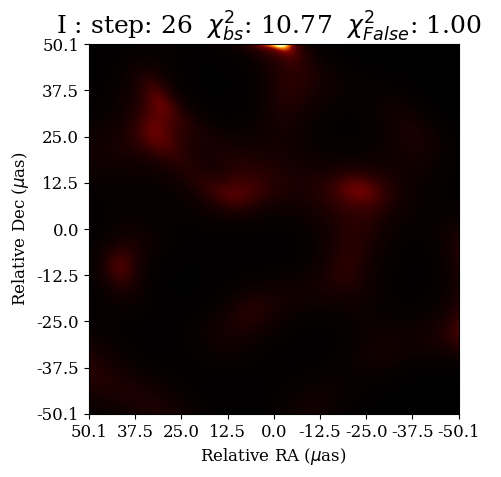

i: 27 chi2_1: 10.37 chi2_2: 1.00 chi2_3: 1.00 s_1: 0.68 s_2: 0.00 s_3: 0.00


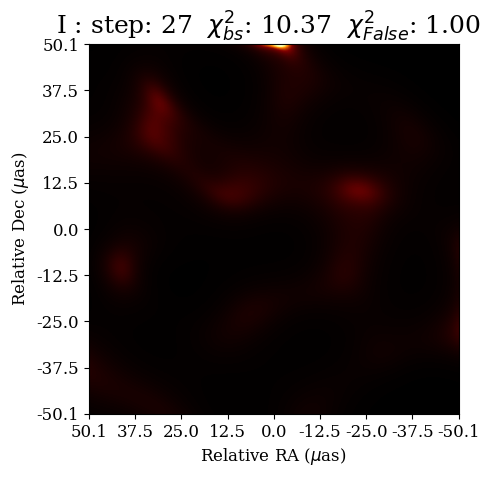

i: 28 chi2_1: 10.01 chi2_2: 1.00 chi2_3: 1.00 s_1: 0.70 s_2: 0.00 s_3: 0.00


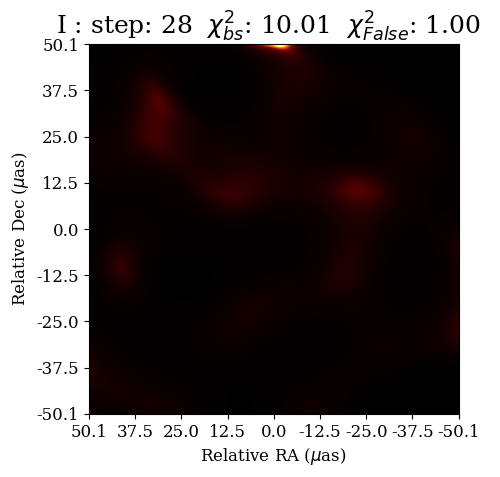

i: 29 chi2_1: 9.67 chi2_2: 1.00 chi2_3: 1.00 s_1: 0.70 s_2: 0.00 s_3: 0.00


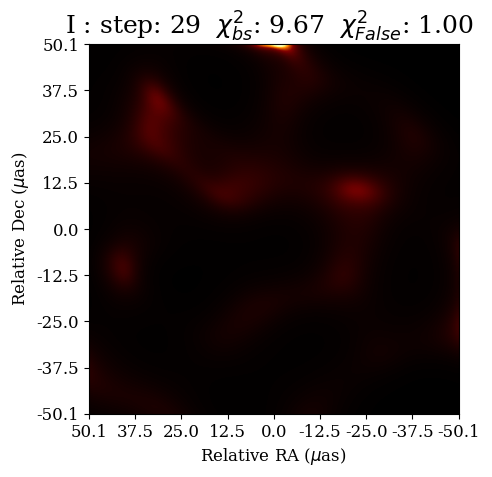

i: 30 chi2_1: 9.39 chi2_2: 1.00 chi2_3: 1.00 s_1: 0.72 s_2: 0.00 s_3: 0.00


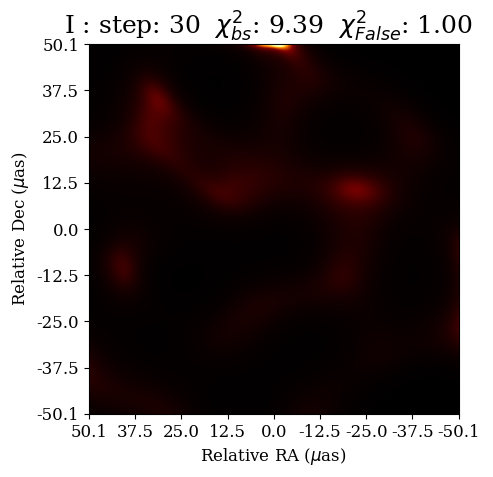

i: 31 chi2_1: 9.09 chi2_2: 1.00 chi2_3: 1.00 s_1: 0.75 s_2: 0.00 s_3: 0.00


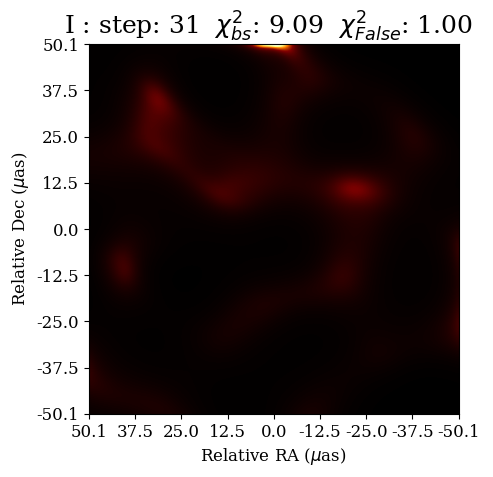

i: 32 chi2_1: 8.82 chi2_2: 1.00 chi2_3: 1.00 s_1: 0.76 s_2: 0.00 s_3: 0.00


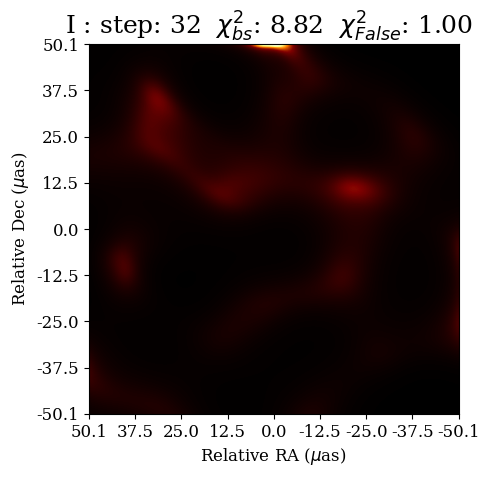

i: 33 chi2_1: 8.52 chi2_2: 1.00 chi2_3: 1.00 s_1: 0.79 s_2: 0.00 s_3: 0.00


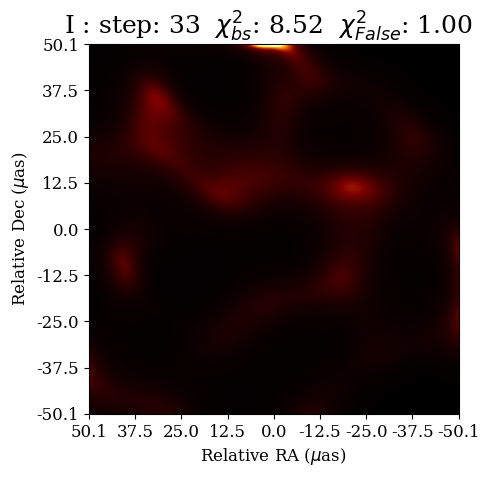

i: 34 chi2_1: 8.39 chi2_2: 1.00 chi2_3: 1.00 s_1: 0.79 s_2: 0.00 s_3: 0.00


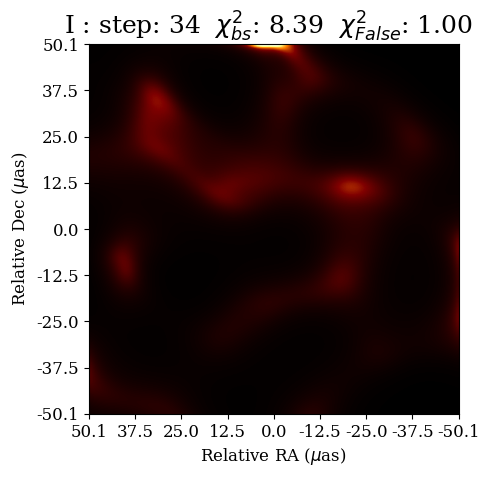

i: 35 chi2_1: 8.32 chi2_2: 1.00 chi2_3: 1.00 s_1: 0.80 s_2: 0.00 s_3: 0.00


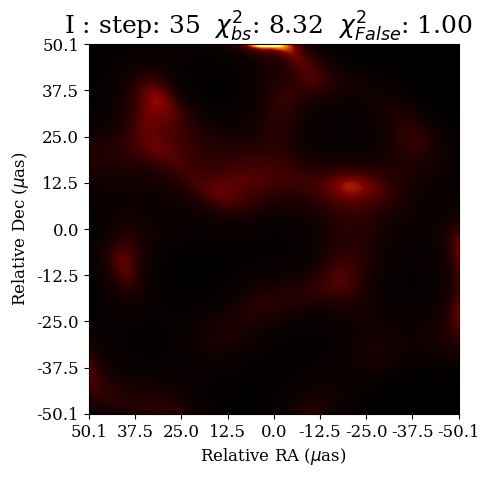

i: 36 chi2_1: 8.27 chi2_2: 1.00 chi2_3: 1.00 s_1: 0.81 s_2: 0.00 s_3: 0.00


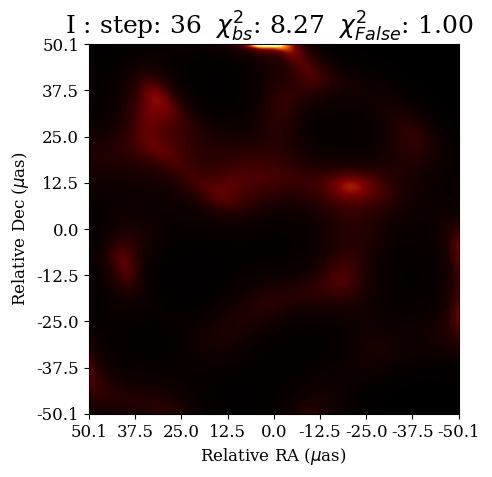

i: 37 chi2_1: 8.05 chi2_2: 1.00 chi2_3: 1.00 s_1: 0.84 s_2: 0.00 s_3: 0.00


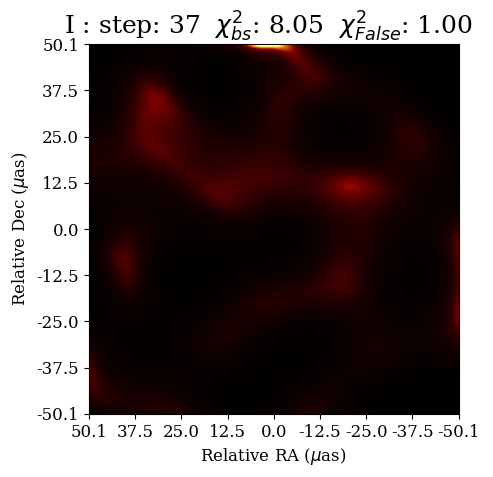

i: 38 chi2_1: 7.80 chi2_2: 1.00 chi2_3: 1.00 s_1: 0.85 s_2: 0.00 s_3: 0.00


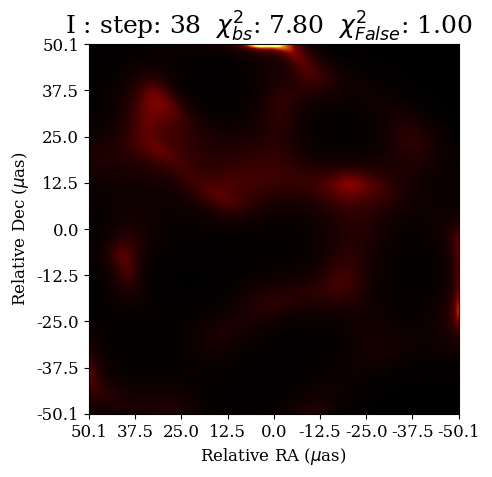

i: 39 chi2_1: 7.61 chi2_2: 1.00 chi2_3: 1.00 s_1: 0.87 s_2: 0.00 s_3: 0.00


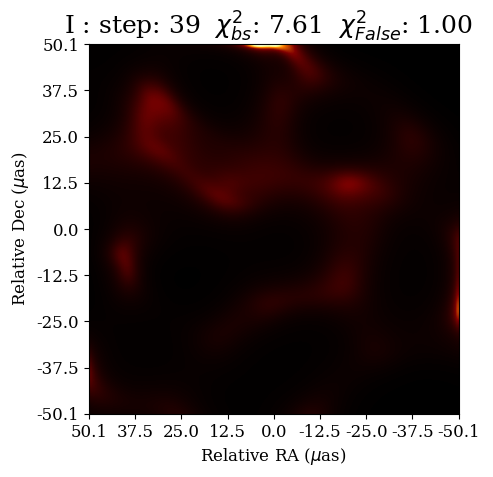

i: 40 chi2_1: 7.49 chi2_2: 1.00 chi2_3: 1.00 s_1: 0.86 s_2: 0.00 s_3: 0.00


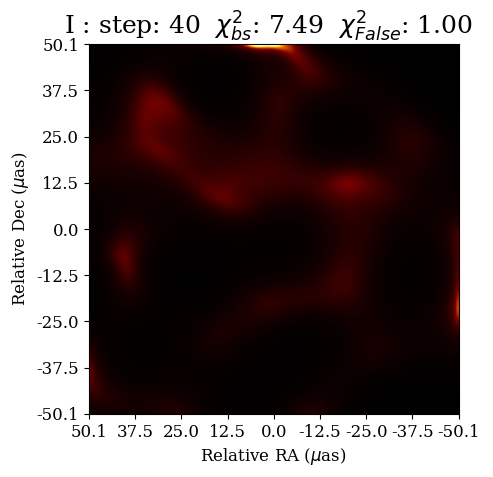

i: 41 chi2_1: 7.42 chi2_2: 1.00 chi2_3: 1.00 s_1: 0.89 s_2: 0.00 s_3: 0.00


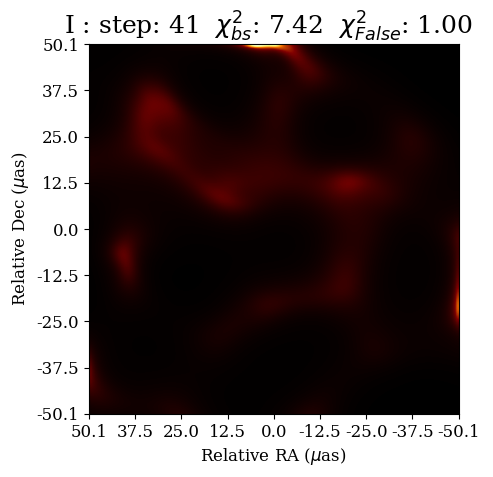

i: 42 chi2_1: 7.31 chi2_2: 1.00 chi2_3: 1.00 s_1: 0.88 s_2: 0.00 s_3: 0.00


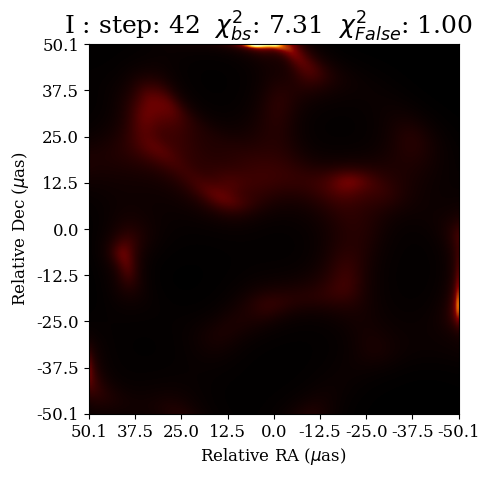

i: 43 chi2_1: 7.13 chi2_2: 1.00 chi2_3: 1.00 s_1: 0.92 s_2: 0.00 s_3: 0.00


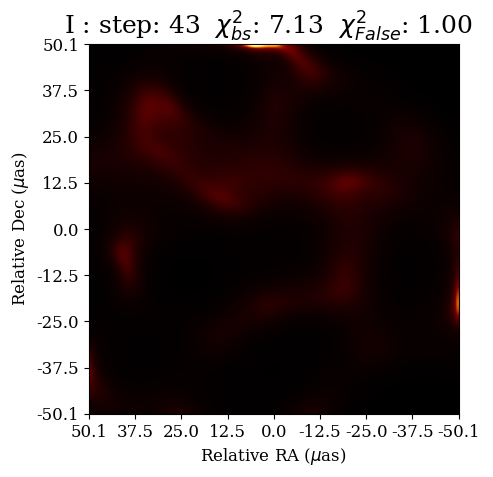

i: 44 chi2_1: 7.02 chi2_2: 1.00 chi2_3: 1.00 s_1: 0.91 s_2: 0.00 s_3: 0.00


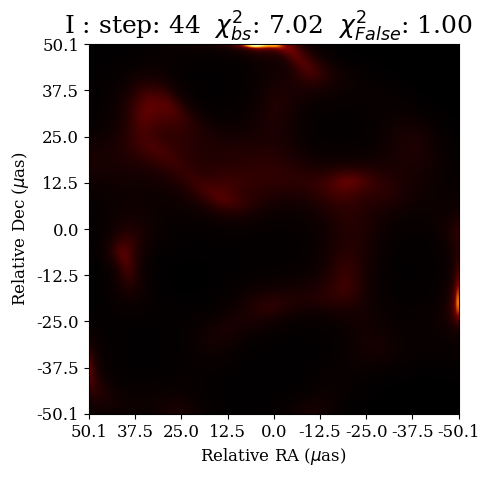

i: 45 chi2_1: 6.93 chi2_2: 1.00 chi2_3: 1.00 s_1: 0.91 s_2: 0.00 s_3: 0.00


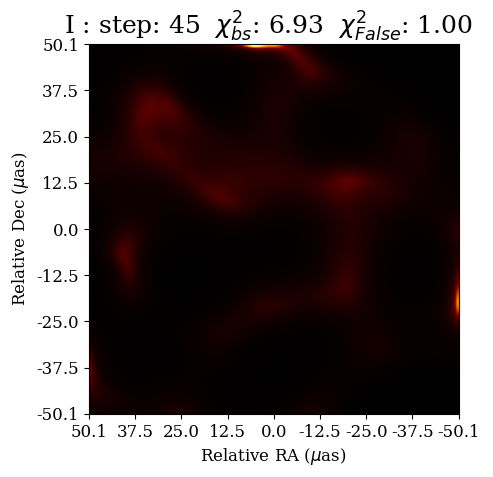

i: 46 chi2_1: 6.79 chi2_2: 1.00 chi2_3: 1.00 s_1: 0.92 s_2: 0.00 s_3: 0.00


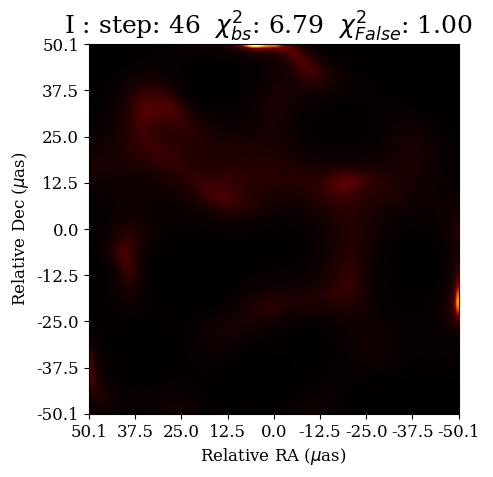

i: 47 chi2_1: 6.68 chi2_2: 1.00 chi2_3: 1.00 s_1: 0.94 s_2: 0.00 s_3: 0.00


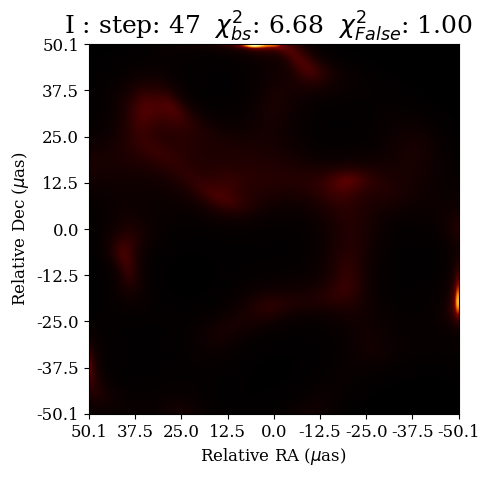

i: 48 chi2_1: 6.66 chi2_2: 1.00 chi2_3: 1.00 s_1: 0.92 s_2: 0.00 s_3: 0.00


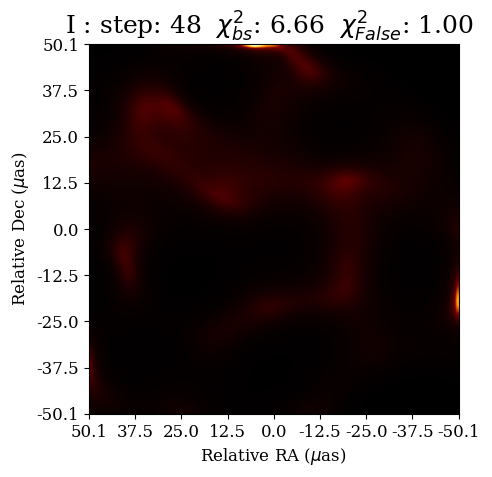

i: 49 chi2_1: 6.55 chi2_2: 1.00 chi2_3: 1.00 s_1: 0.93 s_2: 0.00 s_3: 0.00


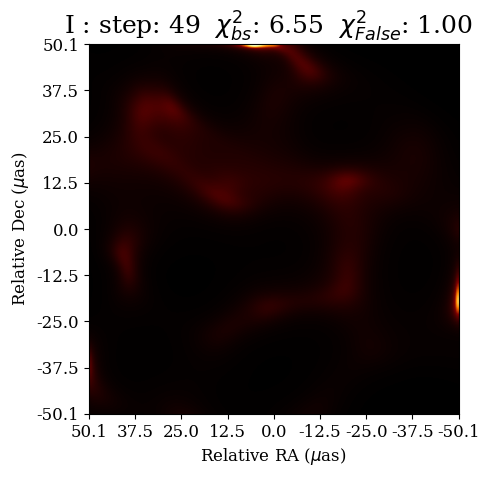

i: 50 chi2_1: 6.50 chi2_2: 1.00 chi2_3: 1.00 s_1: 0.95 s_2: 0.00 s_3: 0.00


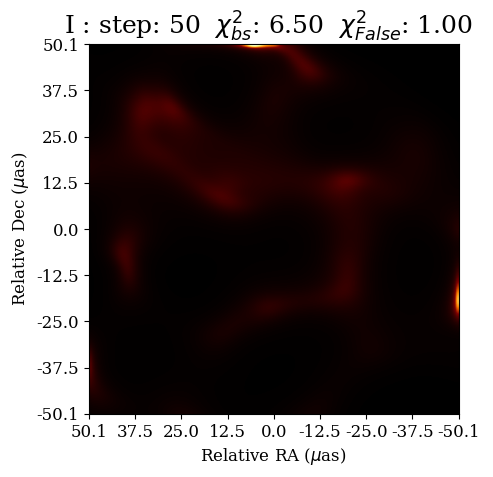

i: 51 chi2_1: 6.42 chi2_2: 1.00 chi2_3: 1.00 s_1: 0.97 s_2: 0.00 s_3: 0.00


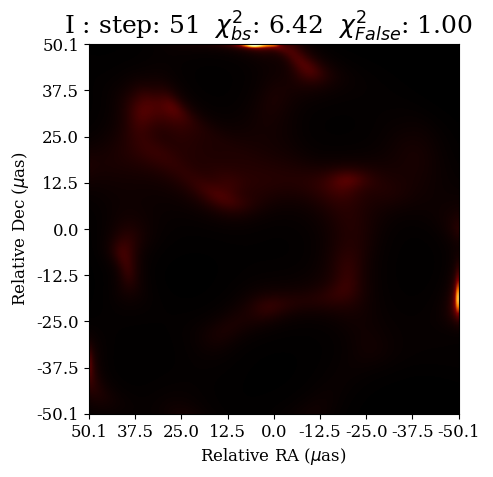

i: 52 chi2_1: 6.26 chi2_2: 1.00 chi2_3: 1.00 s_1: 1.01 s_2: 0.00 s_3: 0.00


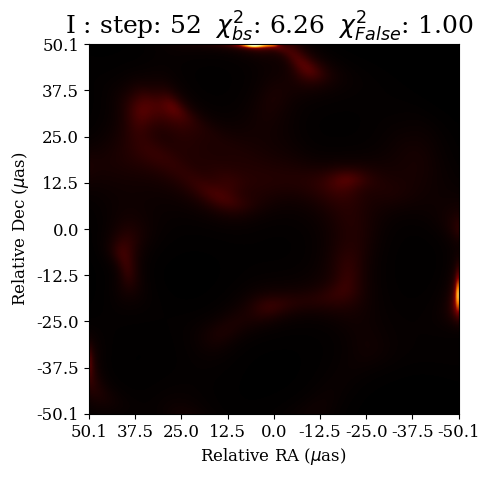

i: 53 chi2_1: 6.15 chi2_2: 1.00 chi2_3: 1.00 s_1: 1.02 s_2: 0.00 s_3: 0.00


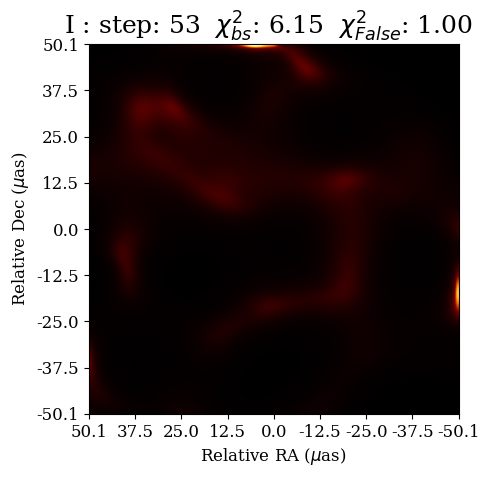

i: 54 chi2_1: 6.05 chi2_2: 1.00 chi2_3: 1.00 s_1: 1.03 s_2: 0.00 s_3: 0.00


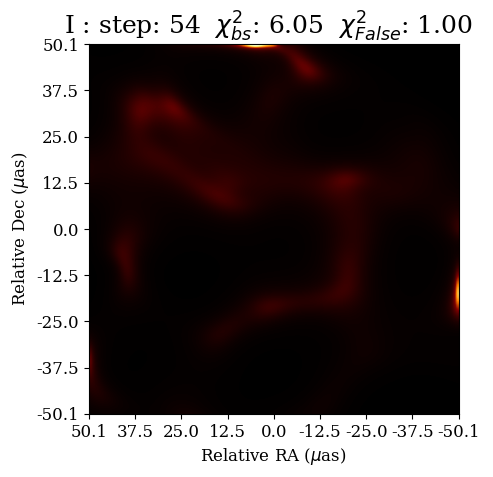

i: 55 chi2_1: 6.00 chi2_2: 1.00 chi2_3: 1.00 s_1: 1.04 s_2: 0.00 s_3: 0.00


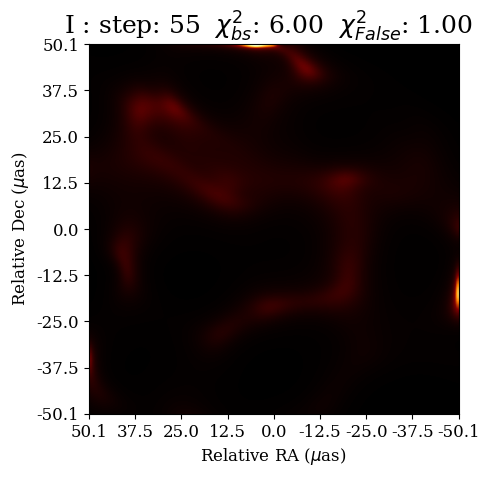

i: 56 chi2_1: 5.94 chi2_2: 1.00 chi2_3: 1.00 s_1: 1.03 s_2: 0.00 s_3: 0.00


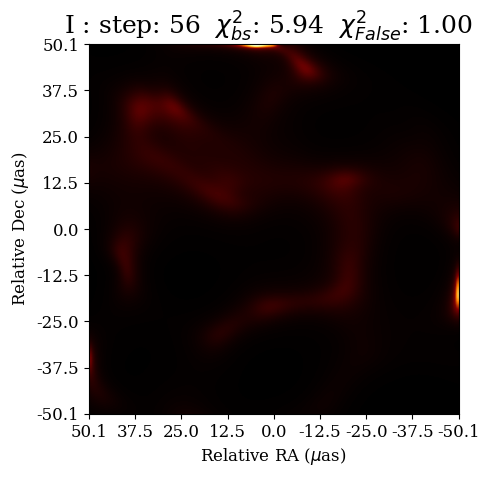

i: 57 chi2_1: 5.88 chi2_2: 1.00 chi2_3: 1.00 s_1: 1.07 s_2: 0.00 s_3: 0.00


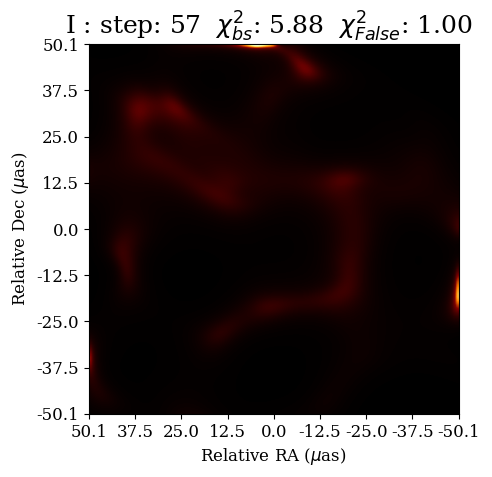

i: 58 chi2_1: 5.81 chi2_2: 1.00 chi2_3: 1.00 s_1: 1.06 s_2: 0.00 s_3: 0.00


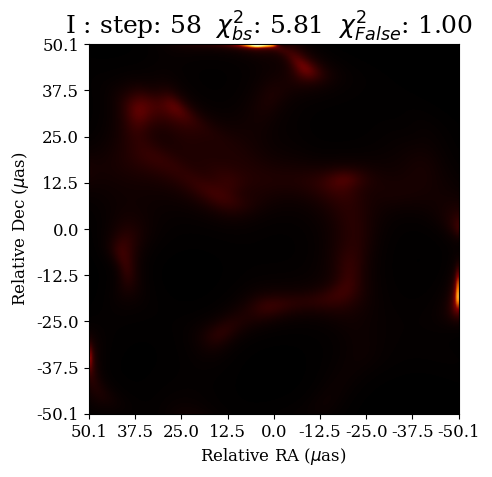

i: 59 chi2_1: 5.74 chi2_2: 1.00 chi2_3: 1.00 s_1: 1.07 s_2: 0.00 s_3: 0.00


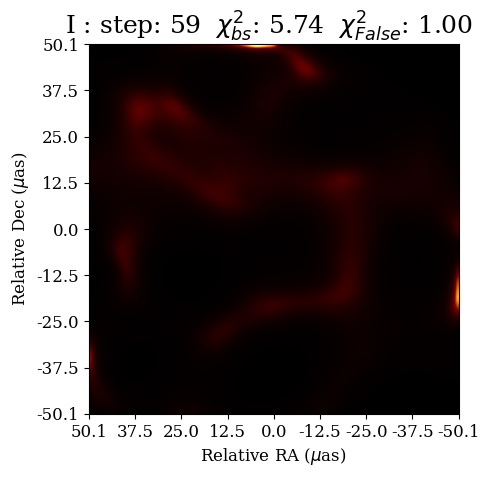

i: 60 chi2_1: 5.68 chi2_2: 1.00 chi2_3: 1.00 s_1: 1.09 s_2: 0.00 s_3: 0.00


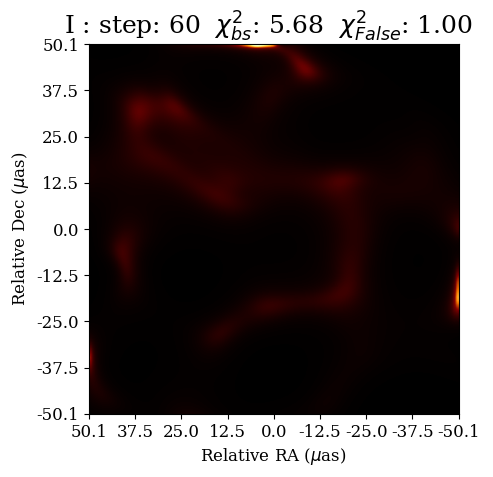

i: 61 chi2_1: 5.61 chi2_2: 1.00 chi2_3: 1.00 s_1: 1.10 s_2: 0.00 s_3: 0.00


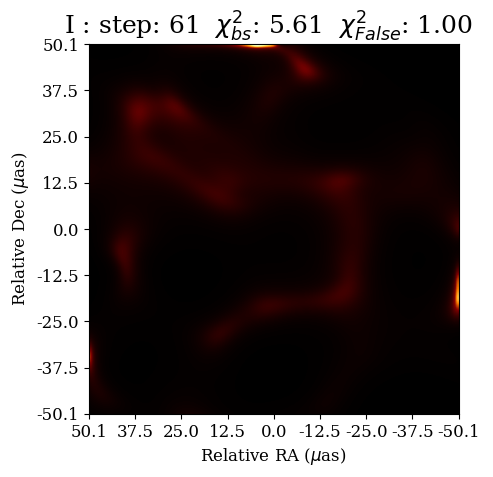

i: 62 chi2_1: 5.52 chi2_2: 1.00 chi2_3: 1.00 s_1: 1.11 s_2: 0.00 s_3: 0.00


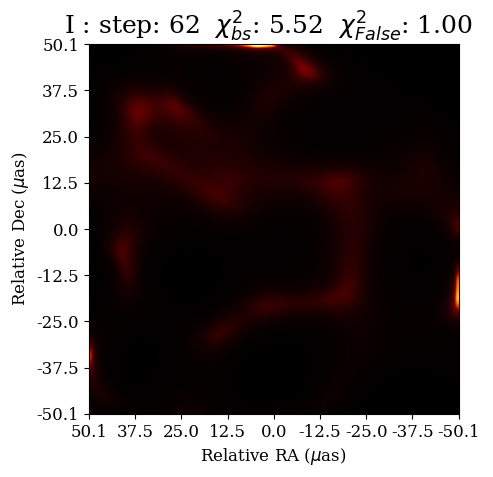

i: 63 chi2_1: 5.45 chi2_2: 1.00 chi2_3: 1.00 s_1: 1.12 s_2: 0.00 s_3: 0.00


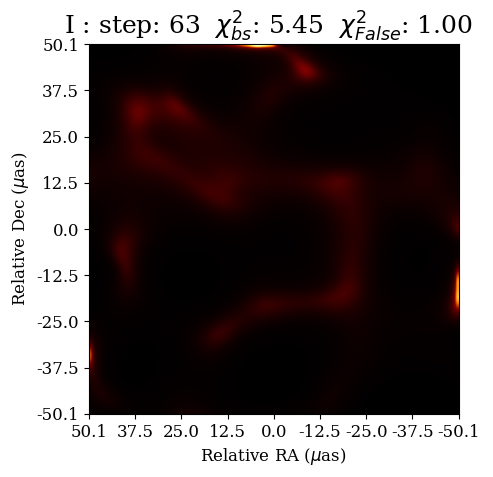

i: 64 chi2_1: 5.42 chi2_2: 1.00 chi2_3: 1.00 s_1: 1.11 s_2: 0.00 s_3: 0.00


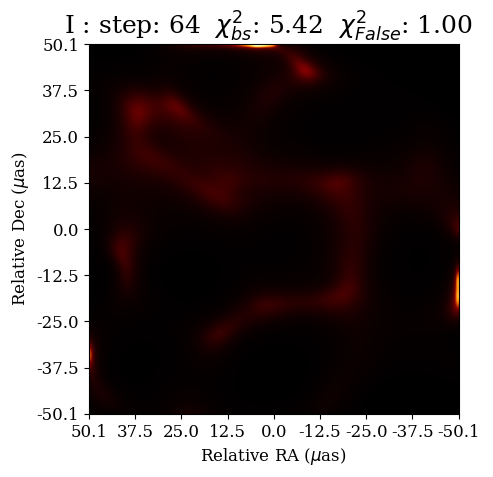

i: 65 chi2_1: 5.38 chi2_2: 1.00 chi2_3: 1.00 s_1: 1.14 s_2: 0.00 s_3: 0.00


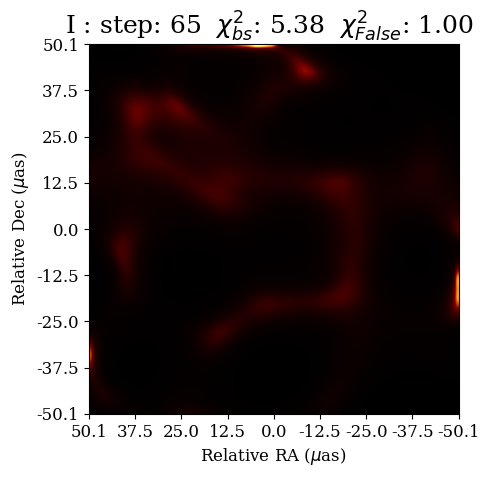

i: 66 chi2_1: 5.31 chi2_2: 1.00 chi2_3: 1.00 s_1: 1.16 s_2: 0.00 s_3: 0.00


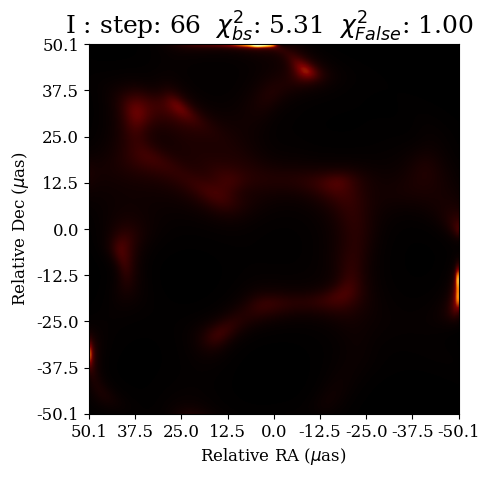

i: 67 chi2_1: 5.26 chi2_2: 1.00 chi2_3: 1.00 s_1: 1.20 s_2: 0.00 s_3: 0.00


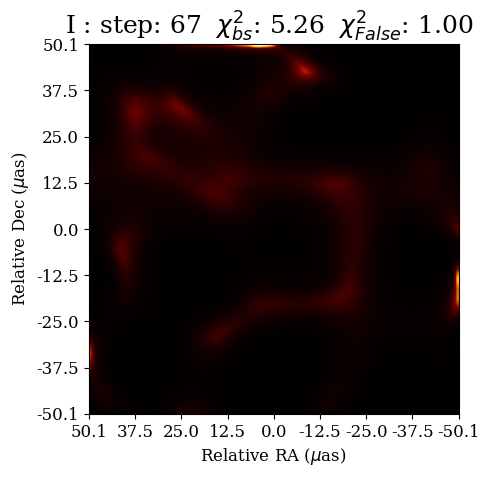

i: 68 chi2_1: 5.23 chi2_2: 1.00 chi2_3: 1.00 s_1: 1.19 s_2: 0.00 s_3: 0.00


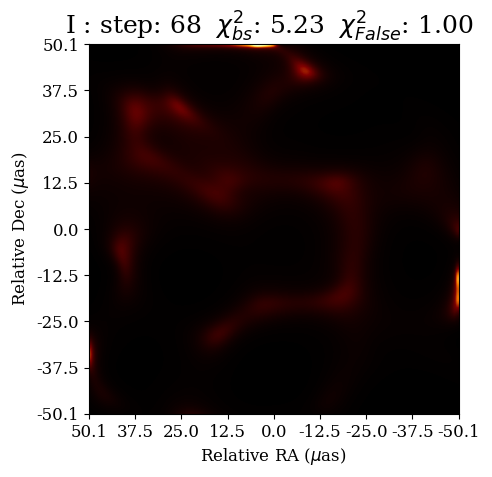

i: 69 chi2_1: 5.21 chi2_2: 1.00 chi2_3: 1.00 s_1: 1.19 s_2: 0.00 s_3: 0.00


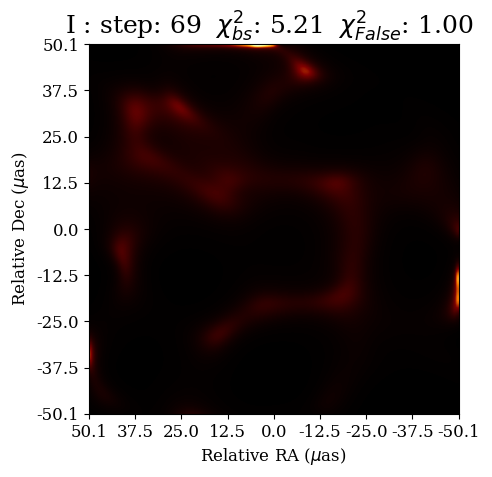

i: 70 chi2_1: 5.17 chi2_2: 1.00 chi2_3: 1.00 s_1: 1.19 s_2: 0.00 s_3: 0.00


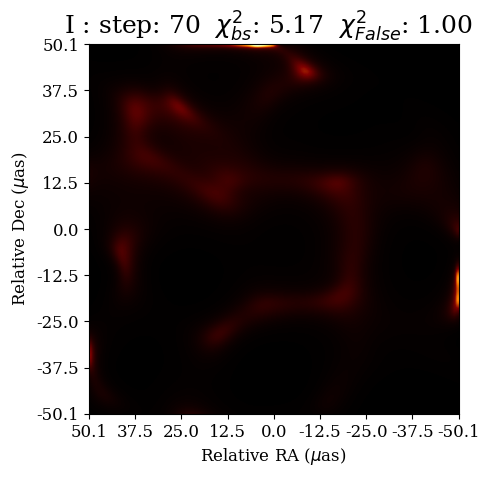

i: 71 chi2_1: 5.13 chi2_2: 1.00 chi2_3: 1.00 s_1: 1.19 s_2: 0.00 s_3: 0.00


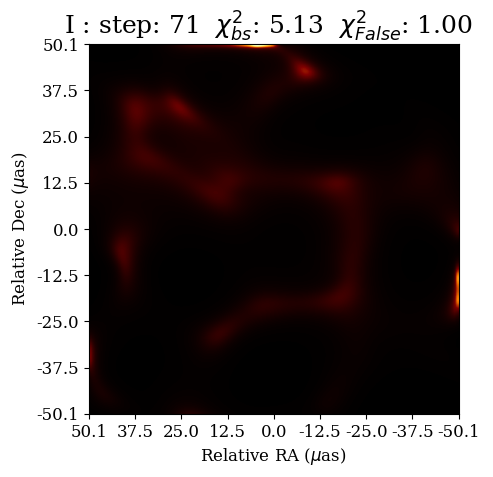

i: 72 chi2_1: 5.05 chi2_2: 1.00 chi2_3: 1.00 s_1: 1.21 s_2: 0.00 s_3: 0.00


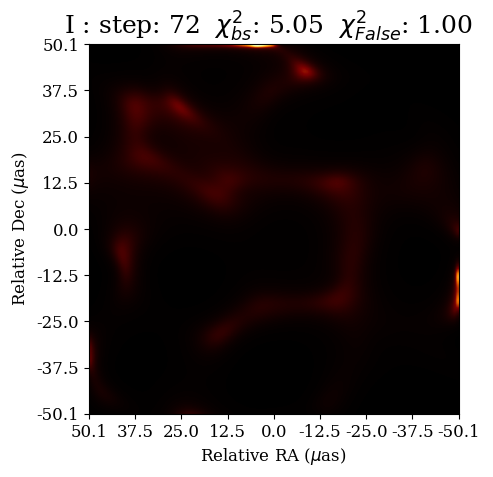

i: 73 chi2_1: 5.00 chi2_2: 1.00 chi2_3: 1.00 s_1: 1.20 s_2: 0.00 s_3: 0.00


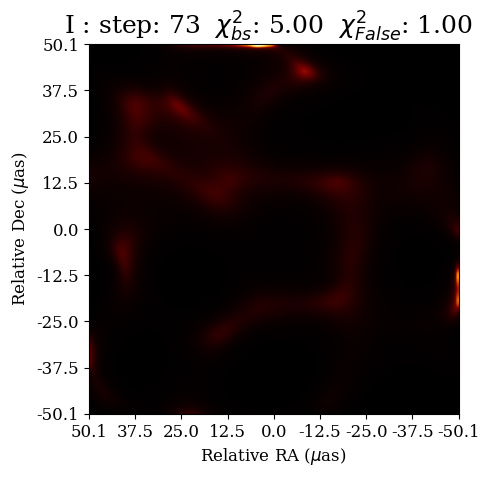

i: 74 chi2_1: 4.97 chi2_2: 1.00 chi2_3: 1.00 s_1: 1.21 s_2: 0.00 s_3: 0.00


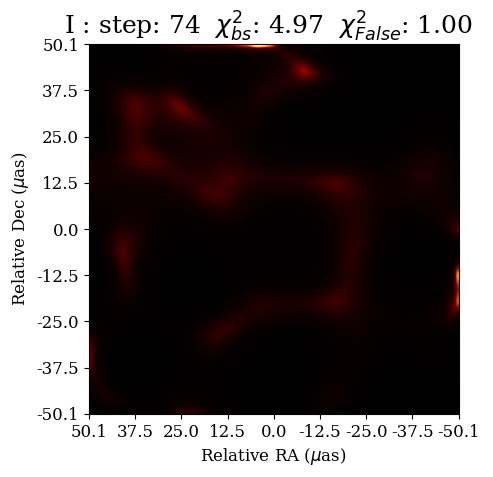

i: 75 chi2_1: 4.93 chi2_2: 1.00 chi2_3: 1.00 s_1: 1.23 s_2: 0.00 s_3: 0.00


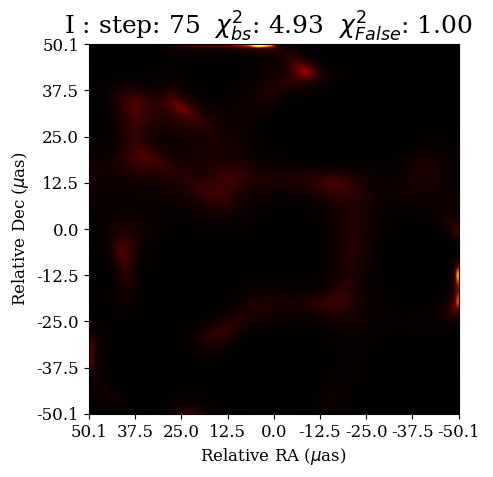

i: 76 chi2_1: 4.88 chi2_2: 1.00 chi2_3: 1.00 s_1: 1.25 s_2: 0.00 s_3: 0.00


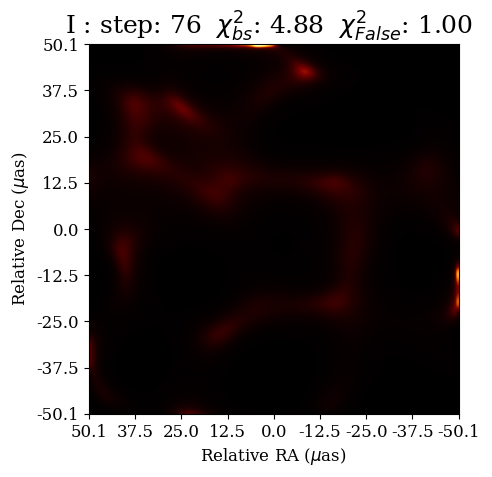

i: 77 chi2_1: 4.83 chi2_2: 1.00 chi2_3: 1.00 s_1: 1.30 s_2: 0.00 s_3: 0.00


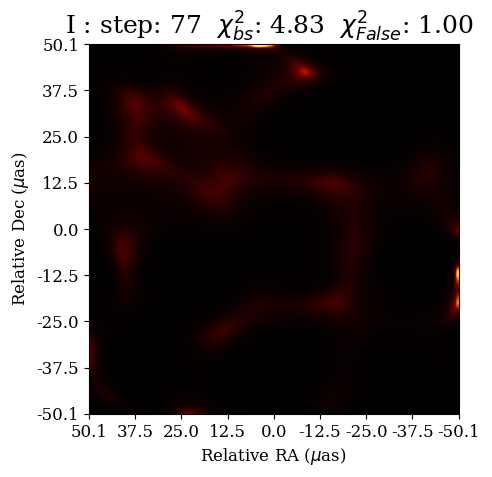

i: 78 chi2_1: 4.81 chi2_2: 1.00 chi2_3: 1.00 s_1: 1.29 s_2: 0.00 s_3: 0.00


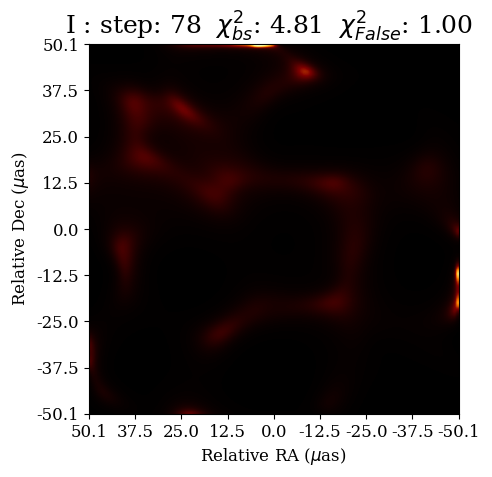

i: 79 chi2_1: 4.79 chi2_2: 1.00 chi2_3: 1.00 s_1: 1.30 s_2: 0.00 s_3: 0.00


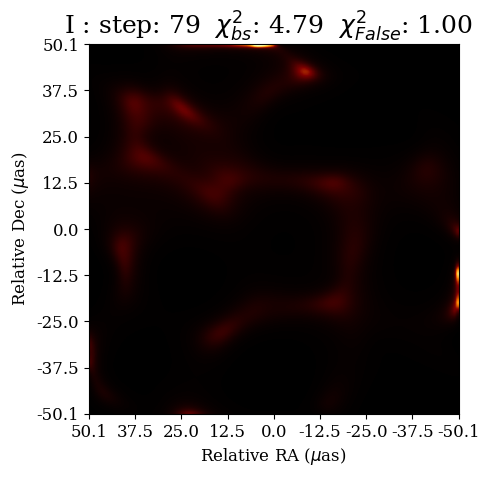

i: 80 chi2_1: 4.77 chi2_2: 1.00 chi2_3: 1.00 s_1: 1.30 s_2: 0.00 s_3: 0.00


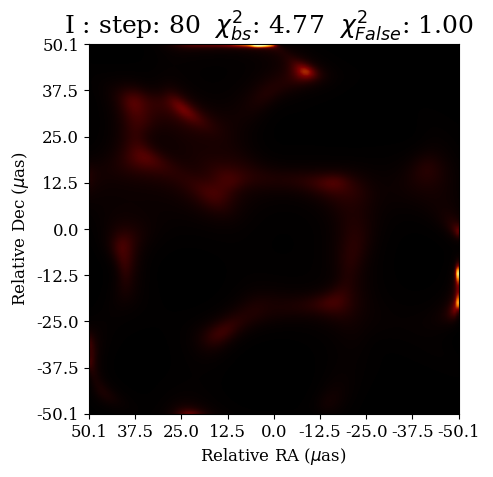

i: 81 chi2_1: 4.76 chi2_2: 1.00 chi2_3: 1.00 s_1: 1.28 s_2: 0.00 s_3: 0.00


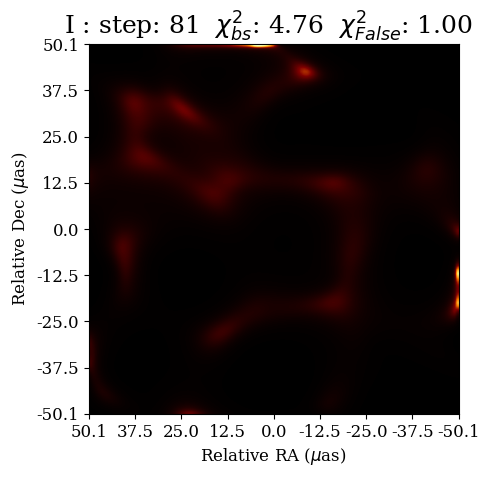

i: 82 chi2_1: 4.74 chi2_2: 1.00 chi2_3: 1.00 s_1: 1.29 s_2: 0.00 s_3: 0.00


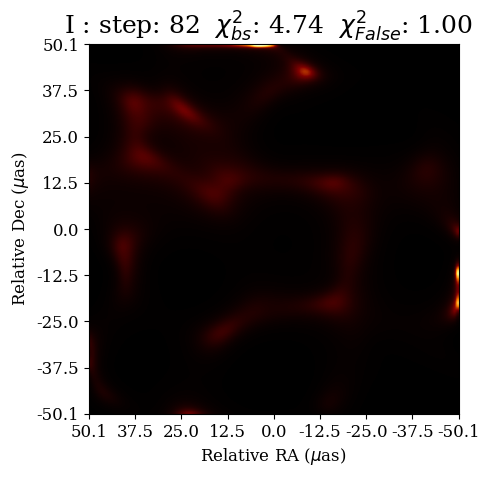

i: 83 chi2_1: 4.72 chi2_2: 1.00 chi2_3: 1.00 s_1: 1.28 s_2: 0.00 s_3: 0.00


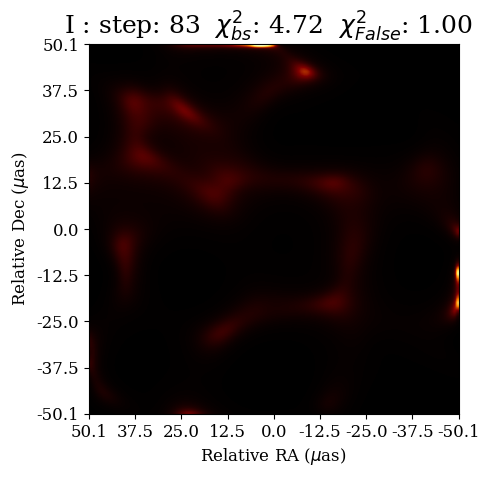

i: 84 chi2_1: 4.70 chi2_2: 1.00 chi2_3: 1.00 s_1: 1.28 s_2: 0.00 s_3: 0.00


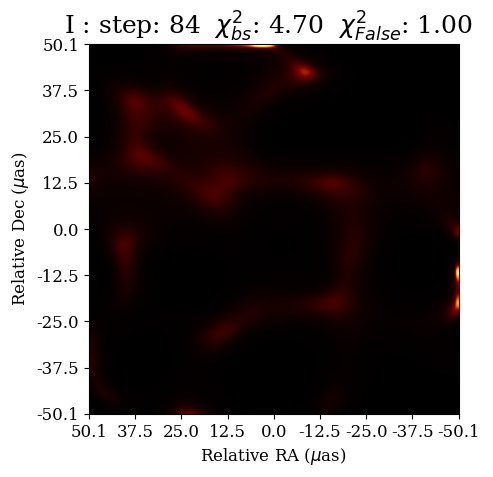

i: 85 chi2_1: 4.67 chi2_2: 1.00 chi2_3: 1.00 s_1: 1.29 s_2: 0.00 s_3: 0.00


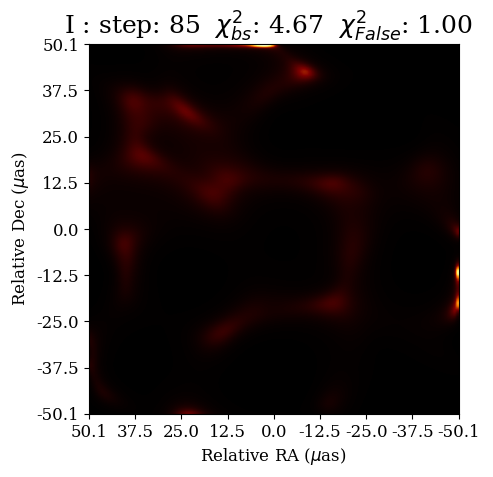

i: 86 chi2_1: 4.63 chi2_2: 1.00 chi2_3: 1.00 s_1: 1.30 s_2: 0.00 s_3: 0.00


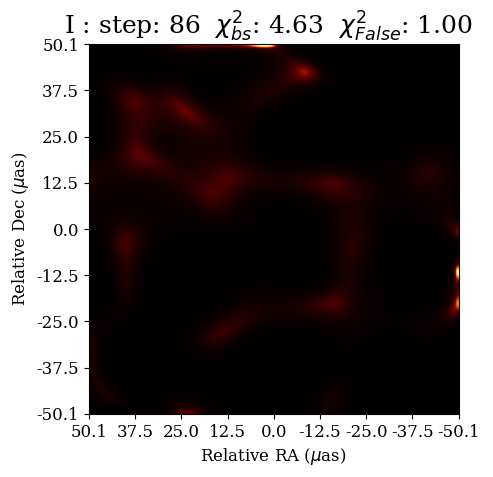

i: 87 chi2_1: 4.59 chi2_2: 1.00 chi2_3: 1.00 s_1: 1.31 s_2: 0.00 s_3: 0.00


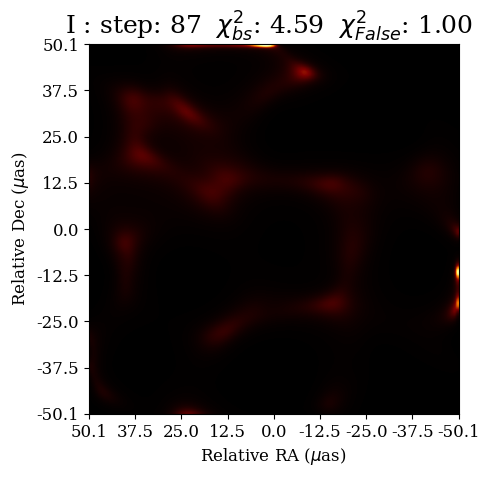

i: 88 chi2_1: 4.57 chi2_2: 1.00 chi2_3: 1.00 s_1: 1.34 s_2: 0.00 s_3: 0.00


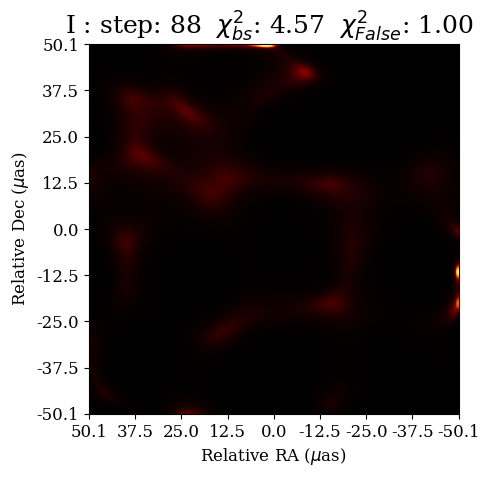

i: 89 chi2_1: 4.56 chi2_2: 1.00 chi2_3: 1.00 s_1: 1.33 s_2: 0.00 s_3: 0.00


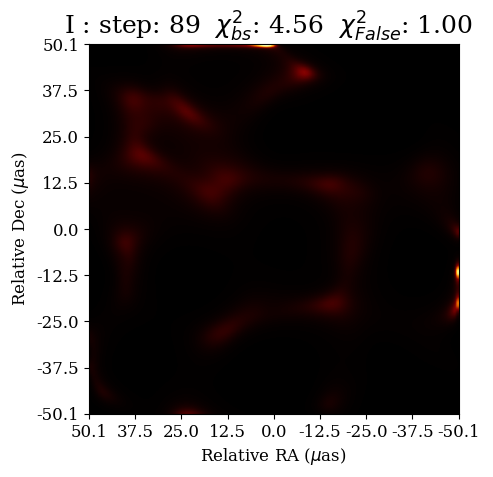

i: 90 chi2_1: 4.54 chi2_2: 1.00 chi2_3: 1.00 s_1: 1.34 s_2: 0.00 s_3: 0.00


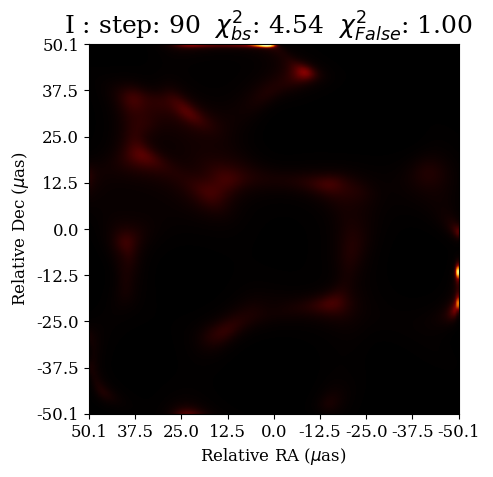

i: 91 chi2_1: 4.52 chi2_2: 1.00 chi2_3: 1.00 s_1: 1.35 s_2: 0.00 s_3: 0.00


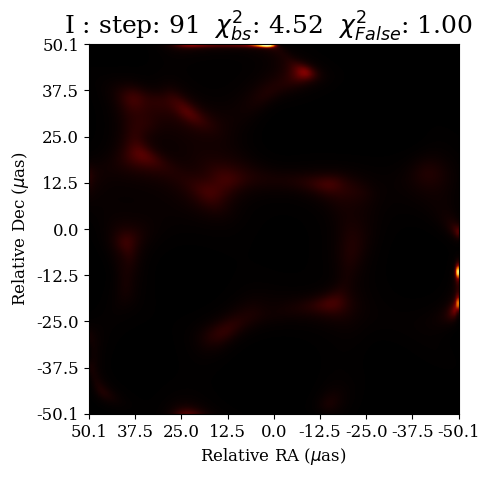

i: 92 chi2_1: 4.50 chi2_2: 1.00 chi2_3: 1.00 s_1: 1.34 s_2: 0.00 s_3: 0.00


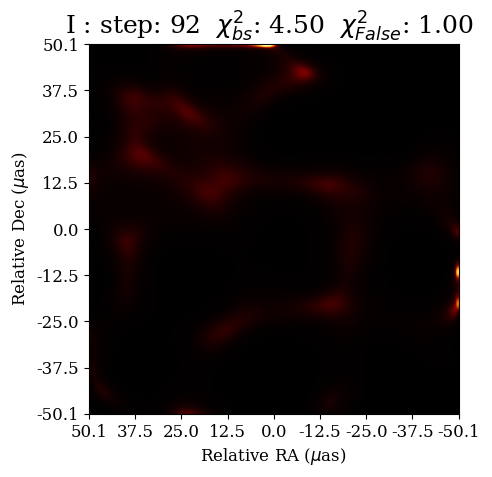

i: 93 chi2_1: 4.48 chi2_2: 1.00 chi2_3: 1.00 s_1: 1.33 s_2: 0.00 s_3: 0.00


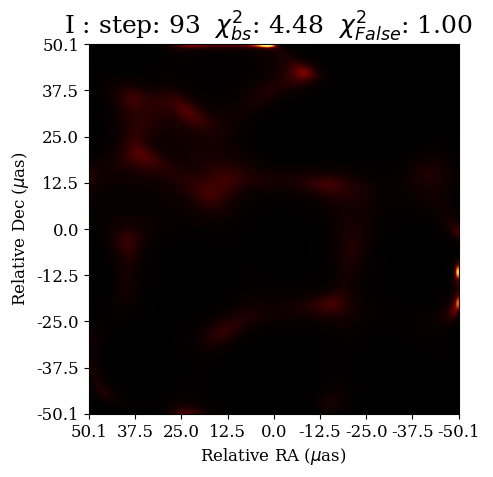

i: 94 chi2_1: 4.43 chi2_2: 1.00 chi2_3: 1.00 s_1: 1.35 s_2: 0.00 s_3: 0.00


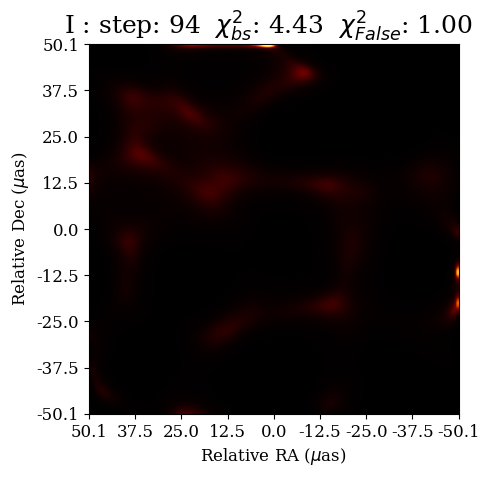

i: 95 chi2_1: 4.40 chi2_2: 1.00 chi2_3: 1.00 s_1: 1.36 s_2: 0.00 s_3: 0.00


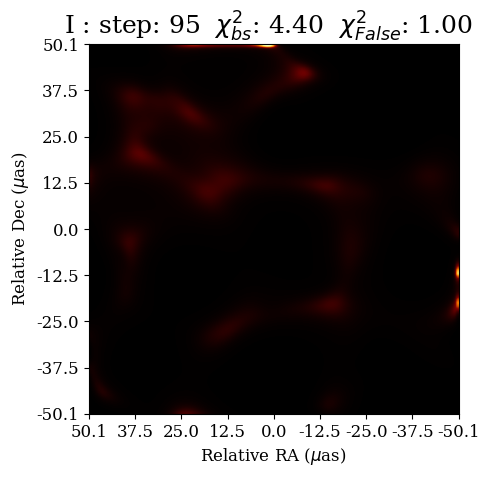

i: 96 chi2_1: 4.38 chi2_2: 1.00 chi2_3: 1.00 s_1: 1.37 s_2: 0.00 s_3: 0.00


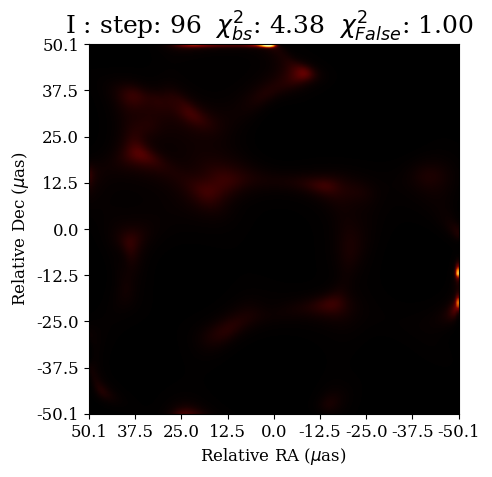

i: 97 chi2_1: 4.36 chi2_2: 1.00 chi2_3: 1.00 s_1: 1.36 s_2: 0.00 s_3: 0.00


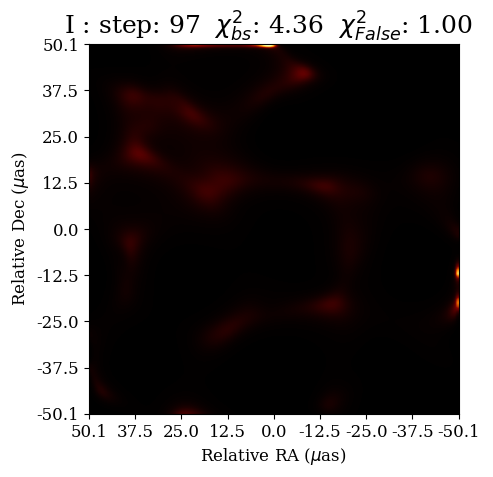

i: 98 chi2_1: 4.33 chi2_2: 1.00 chi2_3: 1.00 s_1: 1.39 s_2: 0.00 s_3: 0.00


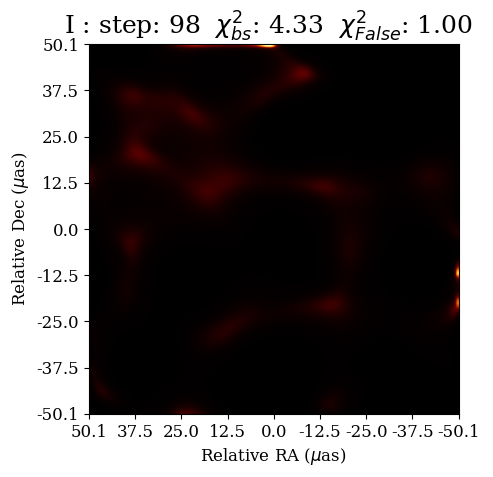

i: 99 chi2_1: 4.31 chi2_2: 1.00 chi2_3: 1.00 s_1: 1.39 s_2: 0.00 s_3: 0.00


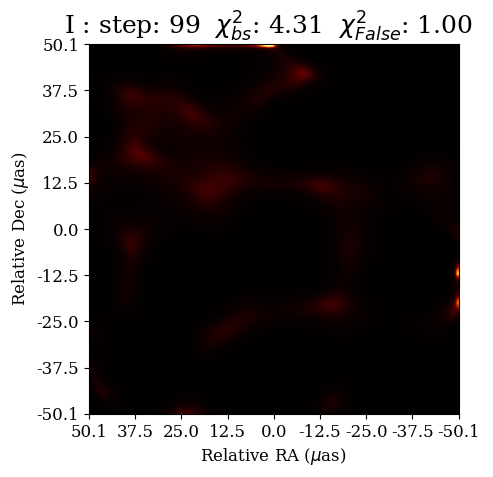

i: 100 chi2_1: 4.29 chi2_2: 1.00 chi2_3: 1.00 s_1: 1.40 s_2: 0.00 s_3: 0.00
time: 80.047642 s
J: 341.242234
Final Chi^2_1: 4.289801 Chi^2_2: 1.000000  Chi^2_3: 1.000000
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT


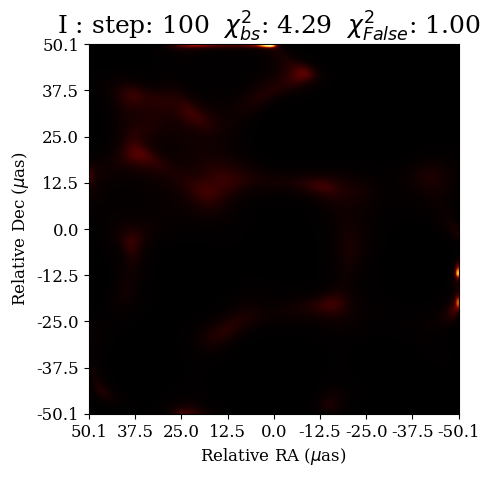

In [9]:
npix = 32
fov = 1.5*im.xdim * im.psize # slightly enlarge the field of view
#dim = obs.dirtyimage(npix, fov)
#dbeam = obs.dirtybeam(npix, fov)
#cbeam = obs.cleanbeam(npix,fov)
#dim.display()
#dbeam.display()
#cbeam.display()

# Resolution
beamparams = obs.fit_beam() # fitted beam parameters (fwhm_maj, fwhm_min, theta) in radians
res = obs.res() # nominal array resolution, 1/longest baseline
print("Clean beam parameters: " , beamparams)
print("Nominal Resolution: " ,res)

# Export the visibility data to uvfits/text
#obs.save_txt('obs.txt') # exports a text file with the visibilities
#obs.save_uvfits('obs.uvp') # exports a UVFITS file modeled on template.UVP

# Generate an image prior
npix = 128
fov = 1*im.fovx()
zbl = im.total_flux() # total flux
prior_fwhm = 200*eh.RADPERUAS # Gaussian size in microarcssec
emptyprior = eh.image.make_square(obs, npix, fov)
flatprior = emptyprior.add_flat(zbl)
gaussprior = emptyprior.add_gauss(zbl, (prior_fwhm, prior_fwhm, 0, 0, 0))

# Image total flux with bispectrum
flux = zbl
tt = time.time()
out  = eh.imager_func(obs, gaussprior, gaussprior, flux,
                      d1='bs', s1='simple',
                      alpha_s1=1, alpha_d1=100,
                      alpha_flux=100, alpha_cm=50,
                      maxit=100, ttype=ttype, show_updates=True)

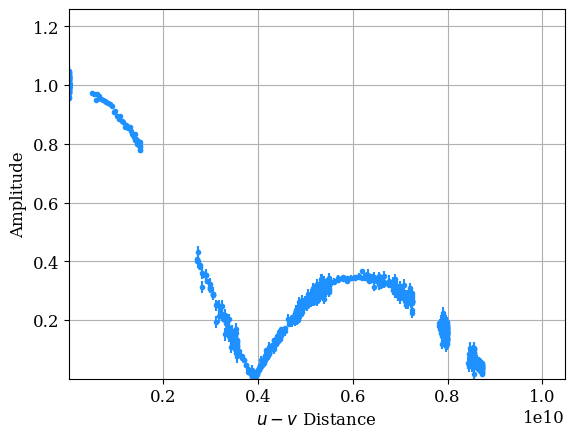

<Axes: xlabel='$u-v$ Distance', ylabel='Amplitude'>

In [9]:
# not quite sure what is plotted here but I think it is a 2D representation of the Fourier space 
obs.plotall('uvdist','amp')

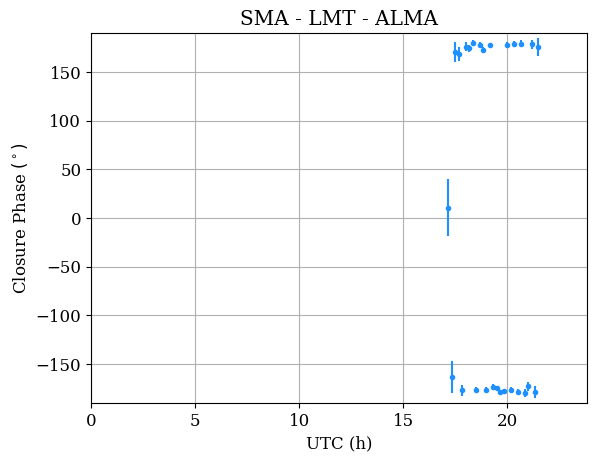

<Axes: title={'center': 'SMA - LMT - ALMA'}, xlabel='UTC (h)', ylabel='Closure Phase $(^\\circ)$'>

In [10]:
# plot of closure phase
obs.plot_cphase('SMA','LMT','ALMA')